In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
measures = ['val', 'precision', 'recall', 'fbeta_score']
total_epoch = 20
test_cases = ['rel', 'skt', 'qdr', 'inf']
methods = ['over', 'random']
result_root = 'logs/'
file_template = '{}_checkpoint_epoch_{}.pt_stat.pkl'

# Precision, Racall and f1-measure

In [23]:
def average_score(result_path):
    with open(result_path, 'rb') as fin:
        x = pickle.load(fin)
        x = x['acc']
    precision = x['precision']
    recall = x['recall']
    f_score = x['fbeta_score']
    support = x['support']
    accuracy = x['val'][-1].item()
    
    ap = np.sum(np.multiply(precision, support)) / np.sum(support)
    ar = np.sum(np.multiply(recall, support)) / np.sum(support)
    af = np.sum(np.multiply(f_score, support)) / np.sum(support)
    return accuracy, ap, ar, af

# return the best each measure, acc, precision, recall, f1 
# for a given test case(target = real)
def the_best_score_test_case(test_case, method):
    f = os.path.join(result_root, method, file_template)
    result_files = [f.format(test_case, epoch) for epoch in range(total_epoch)]
    best_acc=0; best_ap=0; best_ar=0; best_af = 0
    for file in result_files:
        # measures in each epoch
        accuracy, ap, ar, af = average_score(file)
        if accuracy > best_acc:
            best_acc = accuracy
        if ap > best_ap:
            best_ap = ap
        if ar > best_ar:
            best_ar = ar
        if af > best_af:
            best_af = af
    
    return best_acc, best_ap, best_ar, best_af

def display_compare_target(target):
    rand_measures = the_best_score_test_case(target, 'random')
    over_measures = the_best_score_test_case(target, 'over')

    plt.style.use('ggplot')
    fig, ax = plt.subplots()
    index = np.arange(len(rand_measures))
    bar_width = 0.3
    opacity = 0.9
    ax.bar(index, rand_measures, bar_width, alpha=opacity, color='r',
                    label='random')
    ax.bar(index+bar_width, over_measures, bar_width, alpha=opacity, color='b',
                    label='balanced')
    ax.set_xlabel('evaluation measures')
    ax.set_ylabel('score')
    ax.set_title('performance evaluations({})'.format(target))
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(('accuracy','AP','AR','f1'))
    ax.legend(ncol=3)
    plt.show()

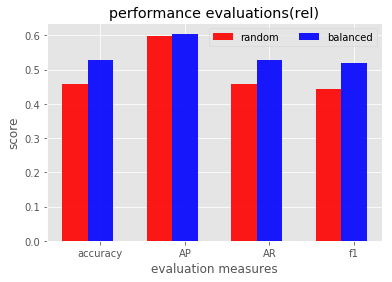

In [24]:
display_compare_target('rel')

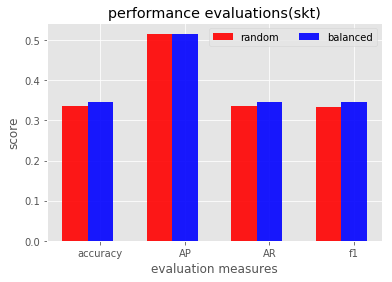

In [25]:
display_compare_target('skt')

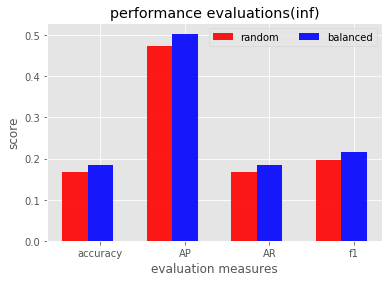

In [26]:
display_compare_target('inf')

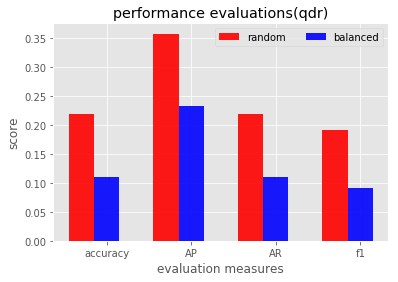

In [27]:
display_compare_target('qdr')